In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
import pandas as pd
df=pd.read_csv('민원.csv', encoding='cp949')
df=df.drop(['가상번호','등록일자','처리상태'], axis=1)
df=df[df['제목'].isnull()==False]
import re
def text_clearning(text):
    hangul = re.compile('[^ㄱ-ㅣ가-힣]+')
    result = hangul.sub('',text)
    return result
df['제목']=df['제목'].apply(lambda x: text_clearning(x))

In [74]:
df['분류'].unique()
df=df[df['분류']=='문화ㆍ경제']

In [75]:
df

,분류,제목
394,문화ㆍ경제,내남지구도서관현황
402,문화ㆍ경제,다수를위한소수의희생은당연한건가요
416,문화ㆍ경제,동명동장동로와동계천로전선지중화공사
467,문화ㆍ경제,신설되는지산에관한건
621,문화ㆍ경제,인기강좌프로그램개설신청
780,문화ㆍ경제,청년창업지원사업을지원하는동구청동구청장님청년체육과에감사합니다
834,문화ㆍ경제,언행일치
996,문화ㆍ경제,종합소득신고나부가가치세신고할수있도록프로그램개설
1036,문화ㆍ경제,하공의랜드마크남광주시장
1244,문화ㆍ경제,전일문화센터프로그램시간대


In [69]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 불용어 사전
korean_stopwords_path = 'korean_stopwords.txt'
with open(korean_stopwords_path, encoding='utf-8') as f:
    stopwords=f.readlines()
stopwords=[x.strip() for x in stopwords]

### 전체 워드클라우드

Counter({'사업': 8, '동명동': 5, '도서관': 4, '프로그램': 3, '동구청': 3, '동구': 3, '관련': 3, '가요': 2, '공사': 2, '개설': 2, '청년': 2, '지원': 2, '신고': 2, '문화센터': 2, '운영': 2, '동아리': 2, '조건': 2, '일자리': 2, '카페': 2, '지역': 2, '전당': 2, '야간': 2, '경관': 2, '문화': 2, '센터': 2, '산수': 2, '거리': 2, '남지': 1, '현황': 1, '다수': 1, '수의': 1, '희생': 1, '장동': 1, '동계천': 1, '전선지': 1, '중화': 1, '신설': 1, '지산': 1, '기강': 1, '신청': 1, '창업': 1, '을지': 1, '장님': 1, '체육': 1, '언행': 1, '일치': 1, '종합': 1, '소득': 1, '부가가치세': 1, '랜드마크': 1, '광주시': 1, '전일': 1, '시간대': 1, '비지': 1, '가지': 1, '타당': 1, '쓰레기봉투': 1, '판매점': 1, '현재': 1, '공모': 1, '엄정': 1, '공유': 1, '광주': 1, '광역시': 1, '구분': 1, '게시': 1, '다문화': 1, '진행': 1, '평가': 1, '세금': 1, '에쓰': 1, '여지': 1, '평생교육': 1, '대금': 1, '수업': 1, '하반기': 1, '고등학교': 1, '불법': 1, '현수막': 1, '철거': 1, '강소': 1, '관광지': 1, '푸른': 1, '마을': 1, '공동체': 1, '시장': 1, '판이': 1, '영어': 1, '회화': 1, '전자책': 1, '서비스': 1, '구시': 1, '민수': 1, '정책': 1, '농로길': 1, '포장': 1, '대리점': 1, '노점상': 1, '단속': 1, '중앙': 1, '부탁': 1, '생각': 1, '도로': 1, '개선': 1, '도시재생': 1, '코로나': 

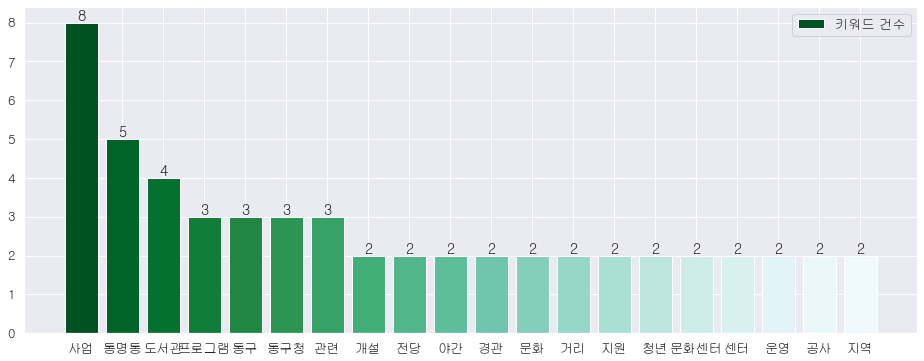

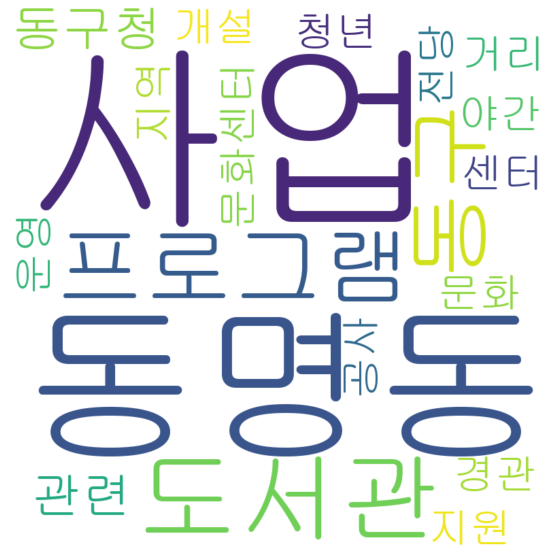

In [76]:

#말뭉치 추출
corpus=''.join(df['제목'].tolist())
from konlpy.tag import Okt
from collections import Counter
import seaborn as sns

#명사 키워드 추출
nouns_tagger = Okt()
nouns=nouns_tagger.nouns(corpus)
count=Counter(nouns)

#한글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x)>1})
print(remove_char_counter)

#단어 추출
kw_df=pd.DataFrame(list(remove_char_counter.items()),columns=['word','count'])
sns.set(style='darkgrid', font='KopubDoum',font_scale=1.2)
kw_df=kw_df.sort_values(by=['count'], ascending=False)
kw_df=kw_df.head(20)
print(kw_df)

#한글깨짐
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#그래프
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(1,1,1)
rects=ax.bar(kw_df['word'], kw_df['count'], color=sns.color_palette('BuGn_r', kw_df['word'].size))
for rect in rects:
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticks(kw_df['word'])
ax.legend(['키워드 건수'], loc='upper right')
plt.savefig('wordcloud/문화ㆍ경제.png')

#!pip install wordcloud
data=dict(zip(kw_df['word'].tolist(),kw_df['count'].tolist()))
from wordcloud import WordCloud
font_path = "C:/Windows/Fonts/NGULIM.TTF"
wc = WordCloud(font_path=font_path,
               width=800, height=800,
               max_words=200,
               background_color="white").generate_from_frequencies(data)
array=wc.to_array()

fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud/문화ㆍ경제_워드클라우드.png')